# Start to run code from "2.LIB and DOC"

# 0. Import packages

In [148]:
import operator
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re 
from numpy.linalg import norm
from scipy.spatial.distance import pdist
import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
import re
import nltk
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import plotly.express as px

from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# 1. Speech Count By President

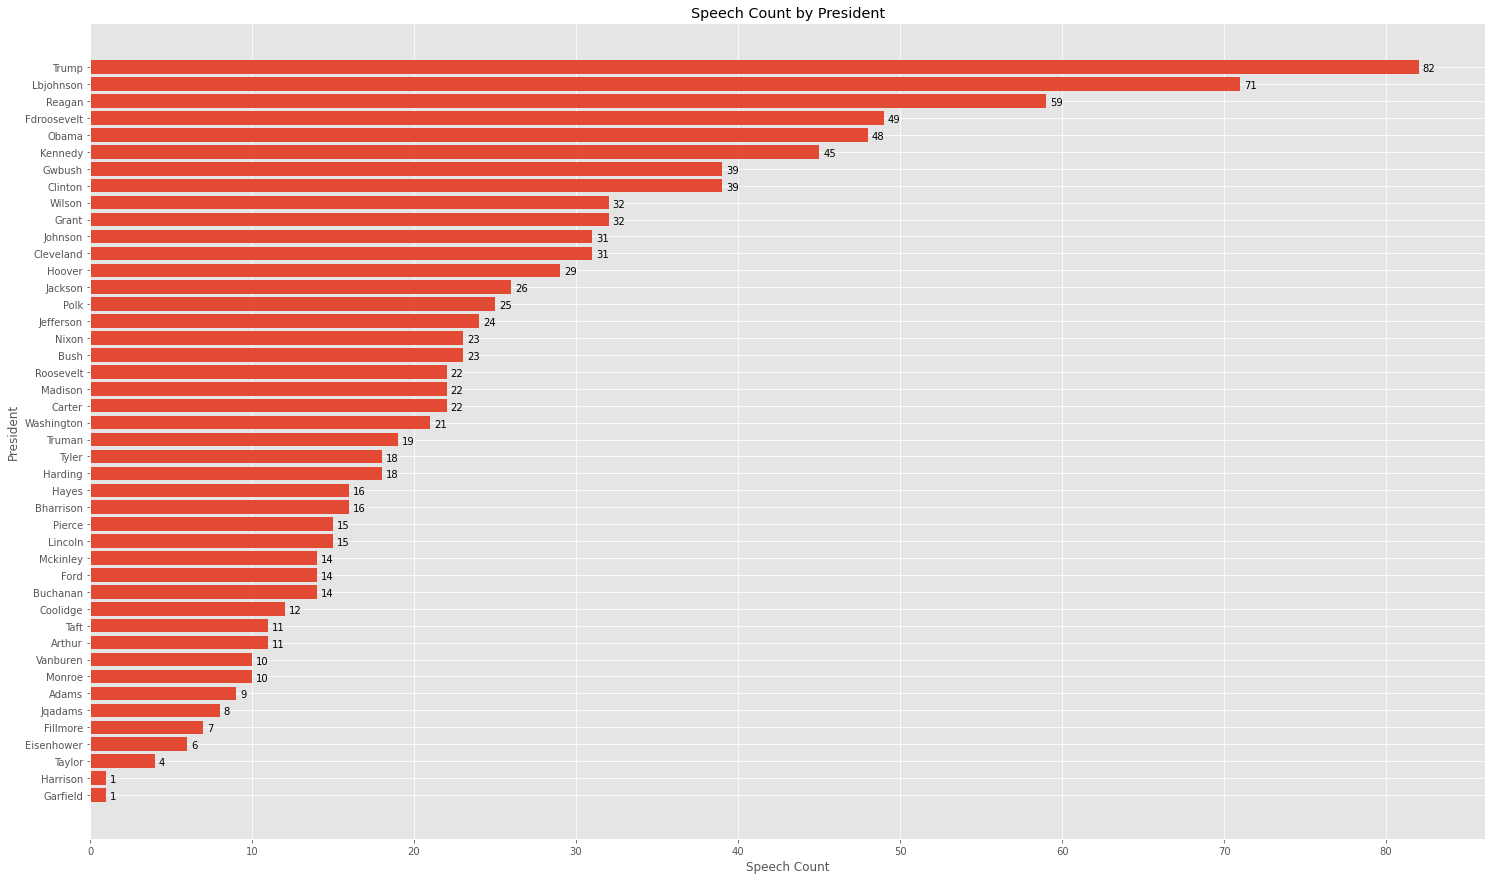

In [70]:
# https://github.com/rwilleynyc/presidential_speech_corpora

lvl1 = 'Corpus of Presidential Speeches/'

# Create dictionary to count number of speeches. 
speech_dict = {}

# For each folder, save the folder name & file count to the dictionary
i=0
for folder in sorted(os.listdir(lvl1)):
    if folder not in ['.DS_Store']:
        speech_dict[folder.title()] = 0
        for file in os.listdir(lvl1 + folder):
            speech_dict[folder.title()] += 1

# Sort results by speech count
sorted_speech_dict = sorted(speech_dict.items(), key=operator.itemgetter(1))

# Plot the results
plt.style.use('ggplot')

x = [val[1] for val in sorted_speech_dict]
y = range(len(sorted_speech_dict))
plt.figure(figsize=(25, 15))
plt.barh(y, x)
plt.yticks(range(len(sorted_speech_dict)), [val[0] for val in sorted_speech_dict])
plt.yticks()
for i, v in enumerate(x):
    plt.text(v + .25, i-.25, str(v))
plt.title('Speech Count by President')
plt.xlabel('Speech Count')
plt.ylabel('President')
plt.show()

# 1.1 President list

In [71]:
i=0
number_holder = []
president_name_holder = []
for pres in sorted(list(os.listdir('Corpus of Presidential Speeches/')))[1:]:
   # print(f'{i}:\t{pres.title()}')
    president_name_holder.append(pres)
    #number_holder.append(i+1)
    #number_holder.append(i += 1)
    i += 1
    number = i
    number_holder.append(number)

In [72]:
president_df = pd.DataFrame()
#president_df['number'] = number_holder
president_df['president_name'] = president_name_holder
president_df

president_name
0           Trump
1           adams
2          arthur
3       bharrison
4        buchanan
5            bush
6          carter
7       cleveland
8         clinton
9        coolidge
10     eisenhower
11    fdroosevelt
12       fillmore
13           ford
14       garfield
15          grant
16         gwbush
17        harding
18       harrison
19          hayes
20         hoover
21        jackson
22      jefferson
23        johnson
24        jqadams
25        kennedy
26      lbjohnson
27        lincoln
28        madison
29       mckinley
30         monroe
31          nixon
32          obama
33         pierce
34           polk
35         reagan
36      roosevelt
37           taft
38         taylor
39         truman
40          tyler
41       vanburen
42     washington
43         wilson

# 2. LIB and DOC

In [73]:
data_in = './Corpus of Presidential Speeches'
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]
my_lib = []
my_doc = []

In [74]:
#data_in = './Corpus of Presidential Speeches'
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
#data_out = './data_out'
def acquire_epubs(epub_list, OHCO=OHCO):
    
    my_lib = []
    my_doc = []

    for epub_file in epub_list:
     #   epub_file = epub_file.replace('-', '_')
        #book_id = epub_file.split('-')[0].split('/')[-1]
        
        book_id = epub_file.replace('-', '_').split('/')[-1]
        president = book_id.split('_')[0]
     #   print("BOOK ID", book_id)
           # Import file as lines
        lines = open(epub_file, 'r', encoding='utf-8-sig').readlines()
        df = pd.DataFrame(lines, columns=['line_str'])
        df.index.name = 'line_num'
        df['book_id'] = book_id
        df['president'] = president
                # FIX CHARACTERS TO IMPROVE TOKENIZATION
        df.line_str = df.line_str.str.replace('—', ' — ')
        df.line_str = df.line_str.str.replace('-', ' - ')
                # Get book title and put into LIB table -- note problems, though
        #book_title = re.sub(r"title= ", "", df.loc[0].line_str, flags=re.IGNORECASE)
        #book_title = re.sub(r"title= ", "", book_title, flags=re.IGNORECASE)

        book_title = df.loc[0].line_str.replace('title= ', '')[8:-3]
      #  df['title'] = book_title[8:-3]
        chap_lines = df.line_str.str.contains(r"title=", case=False)
        #df.loc[chap_lines]
        dfc = df.groupby(OHCO[:1]).line_str.apply(lambda x: '\n'.join(x)).to_frame() # Make big string
        dfp = dfc['line_str'].str.split(r'\n\n+', expand=True).stack()\
        .to_frame().rename(columns={0:'para_str'})
        dfs = dfp['para_str'].str.split(r'[.?!;:"]+', expand=True).stack()\
        .to_frame().rename(columns={0:'sent_str'})
        dfs.index.names = OHCO[:3]
        dfs = dfs[~dfs['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs
        
     #   dft = dfs['sent_str'].str.split(r"[\s',-]+", expand=True).stack()\
      #  .to_frame().rename(columns={0:'token_str'})
        
       # dft.index.names = OHCO[:4]
        
         # Register
        my_lib.append((president,book_id, book_title, epub_file))
        my_doc.append(dfs)   
        
    docs = pd.concat(my_doc)
    library = pd.DataFrame(my_lib, columns=['president','book_id', 'book_title', 'book_file']).set_index('book_id')
    print("Done.")
    return library, docs

In [75]:
epubs = [epub for epub in sorted(glob('./Total_Corpus of Presidential Speeches/*.txt'.format(data_in)))]
LIB, DOC = acquire_epubs(epubs)

Done.


In [76]:
LIB

president  \
book_id                             
Trump_2016_07_22.txt        Trump   
Trump_2016_07_25.txt        Trump   
Trump_2016_07_26.txt        Trump   
Trump_2016_07_27_A.txt      Trump   
Trump_2016_07_27_B.txt      Trump   
...                           ...   
wilson_speeches_027.txt    wilson   
wilson_speeches_028.txt    wilson   
wilson_speeches_029.txt    wilson   
wilson_speeches_030.txt    wilson   
wilson_speeches_031.txt    wilson   

                                                                book_title  \
book_id                                                                      
Trump_2016_07_22.txt     Donald Trump, Republican presidential candidat...   
Trump_2016_07_25.txt     Donald Trump, Republican presidential candidat...   
Trump_2016_07_26.txt     Donald Trump, Republican Presidential Candidat...   
Trump_2016_07_27_A.txt   Donald Trump, Republican presidential candidat...   
Trump_2016_07_27_B.txt   Donald Trump, Republican presidential candidat...   
...                                                                    ...   
wilson_speeches_027.txt                     Wilson&#8217;s Fourteen Points   
wilson_speeches_028.txt                               Sixth Annual Message   
wilson_speeches_029.txt                               Fifth Annual Message   
wilson_speeches_030.txt                             Seventh Annual Message   
wilson_speeches_031.txt                              Eighth Annual Message   

                                                                 book_file  
book_id                                                                     
Trump_2016_07_22.txt     ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_25.txt     ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_26.txt     ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_27_A.txt   ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_27_B.txt   ./Total_Corpus of Presidential Speeches/Trump_...  
...                                                                    ...  
wilson_speeches_027.txt  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_028.txt  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_029.txt  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_030.txt  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_031.txt  ./Total_Corpus of Presidential Speeches/wilson...  

[1044 rows x 3 columns]

In [77]:
LIB[LIB.president == 'Trump'].copy().sort_index()

president  \
book_id                            
Trump_2016_07_22.txt       Trump   
Trump_2016_07_25.txt       Trump   
Trump_2016_07_26.txt       Trump   
Trump_2016_07_27_A.txt     Trump   
Trump_2016_07_27_B.txt     Trump   
...                          ...   
Trump_2016_11_07_B.txt     Trump   
Trump_2016_11_07_C.txt     Trump   
Trump_2016_11_07_D.txt     Trump   
Trump_2016_11_08.txt       Trump   
Trump_2016_11_09.txt       Trump   

                                                               book_title  \
book_id                                                                     
Trump_2016_07_22.txt    Donald Trump, Republican presidential candidat...   
Trump_2016_07_25.txt    Donald Trump, Republican presidential candidat...   
Trump_2016_07_26.txt    Donald Trump, Republican Presidential Candidat...   
Trump_2016_07_27_A.txt  Donald Trump, Republican presidential candidat...   
Trump_2016_07_27_B.txt  Donald Trump, Republican presidential candidat...   
...                                                                   ...   
Trump_2016_11_07_B.txt  Donald Trump, Republican Presidential Candidat...   
Trump_2016_11_07_C.txt  Donald Trump, Republican presidential candidat...   
Trump_2016_11_07_D.txt  Donald Trump, Republican Presidential Candidat...   
Trump_2016_11_08.txt    Donald Trump, Republican presidential candidat...   
Trump_2016_11_09.txt    Donald Trump, Republican presidential candidat...   

                                                                book_file  
book_id                                                                    
Trump_2016_07_22.txt    ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_25.txt    ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_26.txt    ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_27_A.txt  ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_27_B.txt  ./Total_Corpus of Presidential Speeches/Trump_...  
...                                                                   ...  
Trump_2016_11_07_B.txt  ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_11_07_C.txt  ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_11_07_D.txt  ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_11_08.txt    ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_11_09.txt    ./Total_Corpus of Presidential Speeches/Trump_...  

[82 rows x 3 columns]

In [78]:
DOC.head()

sent_str
book_id              chap_num para_num                                                   
Trump_2016_07_22.txt 0        0                                                   <title=
                              1         Donald Trump, Republican presidential candidat...
                              2                                                         >
                     1        0                                                     <date
                              1                                            2016 - 07 - 22

# 3. TOKEN

In [79]:
def tokenize(doc_df, OHCO=OHCO, remove_pos_tuple=False, ws=False):
    
    # Paragraphs to Sentences
    df = doc_df.sent_str\
        .apply(lambda x: pd.Series(nltk.sent_tokenize(x)))\
        .stack()\
        .to_frame()\
        .rename(columns={0:'sent_str'})
    
    # Sentences to Tokens
    # Local function to pick tokenizer
    def word_tokenize(x): # extracted president's name
        if ws:
            s = pd.Series(nltk.pos_tag(nltk.WhitespaceTokenizer().tokenize(x)))
        else:
            s = pd.Series(nltk.pos_tag(nltk.word_tokenize(x)))
        return s
            
    df = df.sent_str\
        .apply(word_tokenize)\
        .stack()\
        .to_frame()\
        .rename(columns={0:'pos_tuple'})
    
    # Grab info from tuple
    df['pos'] = df.pos_tuple.apply(lambda x: x[1])
    df['token_str'] = df.pos_tuple.apply(lambda x: x[0])
    if remove_pos_tuple:
        df = df.drop('pos_tuple', 1)
    
    # Add index
    df.index.names = OHCO
    
    return df

In [80]:
TOKEN = tokenize(DOC, ws=True)

In [81]:
TOKEN['term_str'] = TOKEN['token_str'].str.lower().str.replace('[\W_]', '')

In [82]:
TOKEN

pos_tuple  \
book_id                 chap_num para_num sent_num token_num                       
Trump_2016_07_22.txt    0        0        0        0               (<title=, NN)   
                                 1        0        0               (Donald, NNP)   
                                                   1               (Trump,, NNP)   
                                                   2           (Republican, NNP)   
                                                   3          (presidential, JJ)   
...                                                                          ...   
wilson_speeches_031.txt 21       1        0        28              (whether, IN)   
                                                   29                   (in, IN)   
                                                   30             (America, NNP)   
                                                   31                   (or, CC)   
                                                   32            (elsewhere, RB)   

                                                              pos  \
book_id                 chap_num para_num sent_num token_num        
Trump_2016_07_22.txt    0        0        0        0           NN   
                                 1        0        0          NNP   
                                                   1          NNP   
                                                   2          NNP   
                                                   3           JJ   
...                                                           ...   
wilson_speeches_031.txt 21       1        0        28          IN   
                                                   29          IN   
                                                   30         NNP   
                                                   31          CC   
                                                   32          RB   

                                                                 token_str  \
book_id                 chap_num para_num sent_num token_num                 
Trump_2016_07_22.txt    0        0        0        0               <title=   
                                 1        0        0                Donald   
                                                   1                Trump,   
                                                   2            Republican   
                                                   3          presidential   
...                                                                    ...   
wilson_speeches_031.txt 21       1        0        28              whether   
                                                   29                   in   
                                                   30              America   
                                                   31                   or   
                                                   32            elsewhere   

                                                                  term_str  
book_id                 chap_num para_num sent_num token_num                
Trump_2016_07_22.txt    0        0        0        0                 title  
                                 1        0        0                donald  
                                                   1                 trump  
                                                   2            republican  
                                                   3          presidential  
...                                                                    ...  
wilson_speeches_031.txt 21       1        0        28              whether  
                                                   29                   in  
                                                   30              america  
                                                   31                   or  
                                                   32            elsewhere  

[4281518 rows x 4 columns]

# 4. VOCAB

In [83]:
VOCAB = TOKEN.term_str.value_counts().to_frame().rename(columns={'index':'term_str', 'term_str':'n'})\
    .sort_index().reset_index().rename(columns={'index':'term_str'})
VOCAB.index.name = 'term_id'

In [84]:
VOCAB['num'] = VOCAB.term_str.str.match("\d+").astype('int')

In [85]:
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

In [86]:
VOCAB['stop'] = VOCAB.term_str.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [87]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
VOCAB['p_stem'] = VOCAB.term_str.apply(stemmer.stem)

In [88]:
df_stems = TOKEN.groupby('term_str').pos.apply(lambda x: x.mode()).reset_index().drop_duplicates(subset=['term_str'])
VOCAB['pos_max'] = df_stems['pos']

In [89]:
VOCAB

term_str      n  num  stop   p_stem pos_max
term_id                                               
0                    62526    0     0                :
1                 0     31    1     0        0      CD
2                00     96    1     0       00      CD
3               000      7    1     0      000      CD
4            000000      1    1     0   000000      CD
...             ...    ...  ...   ...      ...     ...
39725    zoological      3    0     0   zoolog     VBN
39726       zooming      1    0     0     zoom      JJ
39727          zoot      1    0     0     zoot      JJ
39728       zuckert      1    0     0  zuckert      JJ
39729       zuloaga      5    0     0  zuloaga      JJ

[39730 rows x 6 columns]

In [90]:
VOCAB = VOCAB.set_index('term_str')

In [91]:
VOCAB 

n  num  stop   p_stem pos_max
term_str                                     
            62526    0     0                :
0              31    1     0        0      CD
00             96    1     0       00      CD
000             7    1     0      000      CD
000000          1    1     0   000000      CD
...           ...  ...   ...      ...     ...
zoological      3    0     0   zoolog     VBN
zooming         1    0     0     zoom      JJ
zoot            1    0     0     zoot      JJ
zuckert         1    0     0  zuckert      JJ
zuloaga         5    0     0  zuloaga      JJ

[39730 rows x 5 columns]

# 5.BOW

In [92]:
bag = CHAPS
tf_type='n'
item_type='term_str'
tf_type='max'
new_col_suffix='_book_max'
tokens = TOKEN
vocab = VOCAB
BOW = tokens.groupby(bag+[item_type])[item_type].count().to_frame('n')
BOW['c'] = 1
D = BOW.groupby(bag).n
BOW['tf'] = BOW.n
vocab['df'] = BOW.groupby('term_str').n.count()
N_docs = len(D.groups)
vocab['idf'] = np.log2(N_docs/vocab.df)
BOW['tfidf'] = BOW.tf * vocab.idf

In [93]:
BOW['tfidf']

book_id                  chap_num  term_str  
Trump_2016_07_22.txt     0                       1.072797
                                   at            2.277380
                                   candidate     7.116143
                                   convention    6.148443
                                   delivers      8.969473
                                                   ...   
wilson_speeches_031.txt  21        victories     9.805974
                                   was           2.641067
                                   whether       4.973084
                                   which         6.063551
                                   you           2.561440
Name: tfidf, Length: 2238873, dtype: float64

In [94]:
BOW.groupby('book_id').sum().sort_values(by = 'tfidf' , ascending=False)

n      c     tf          tfidf
book_id                                                         
lincoln_speeches_000.txt      34132   2432  34132  134407.768965
taft_speeches_007.txt         28093  17207  28093  112666.296526
roosevelt_speeches_019.txt    27691  15151  27691  110816.612733
taft_speeches_009.txt         25467  15012  25467  101369.935108
roosevelt_speeches_014.txt    25305  13789  25305  100528.013714
...                             ...    ...    ...            ...
washington_speeches_006.txt     168    122    168     669.130359
hayes_speeches_001.txt          157    123    157     642.928769
lincoln_speeches_003.txt        164    109    164     636.842197
washington_speeches_009.txt     147    113    147     584.616925
fdroosevelt_speeches_032.txt    156    128    156     582.417080

[1044 rows x 4 columns]

In [95]:
# Compute aggregate TFIDF
col = 'tfidf_sum' + new_col_suffix
vocab[col] = BOW.groupby(item_type)['tfidf'].sum()

# 6. TFIDF

In [96]:
TFIDF = BOW.tfidf.unstack(fill_value=0)
TFIDF

term_str                                       0   00  000  000000  \
book_id                 chap_num                                     
Trump_2016_07_22.txt    0          1.072797  0.0  0.0  0.0     0.0   
                        1          3.218392  0.0  0.0  0.0     0.0   
                        2          1.072797  0.0  0.0  0.0     0.0   
                        3         24.674339  0.0  0.0  0.0     0.0   
                        4         26.819934  0.0  0.0  0.0     0.0   
...                                     ...  ...  ...  ...     ...   
wilson_speeches_031.txt 17         1.072797  0.0  0.0  0.0     0.0   
                        18         0.000000  0.0  0.0  0.0     0.0   
                        19         0.000000  0.0  0.0  0.0     0.0   
                        20         0.000000  0.0  0.0  0.0     0.0   
                        21         0.000000  0.0  0.0  0.0     0.0   

term_str                          0012844122  0014169969  0014187913  \
book_id                 chap_num                                       
Trump_2016_07_22.txt    0                0.0         0.0         0.0   
                        1                0.0         0.0         0.0   
                        2                0.0         0.0         0.0   
                        3                0.0         0.0         0.0   
                        4                0.0         0.0         0.0   
...                                      ...         ...         ...   
wilson_speeches_031.txt 17               0.0         0.0         0.0   
                        18               0.0         0.0         0.0   
                        19               0.0         0.0         0.0   
                        20               0.0         0.0         0.0   
                        21               0.0         0.0         0.0   

term_str                          0014790122  0015789271  ...  zippo  \
book_id                 chap_num                          ...          
Trump_2016_07_22.txt    0                0.0         0.0  ...    0.0   
                        1                0.0         0.0  ...    0.0   
                        2                0.0         0.0  ...    0.0   
                        3                0.0         0.0  ...    0.0   
                        4                0.0         0.0  ...    0.0   
...                                      ...         ...  ...    ...   
wilson_speeches_031.txt 17               0.0         0.0  ...    0.0   
                        18               0.0         0.0  ...    0.0   
                        19               0.0         0.0  ...    0.0   
                        20               0.0         0.0  ...    0.0   
                        21               0.0         0.0  ...    0.0   

term_str                          zollverein  zone  zones  zoning  zoological  \
book_id                 chap_num                                                
Trump_2016_07_22.txt    0                0.0   0.0    0.0     0.0         0.0   
                        1                0.0   0.0    0.0     0.0         0.0   
                        2                0.0   0.0    0.0     0.0         0.0   
                        3                0.0   0.0    0.0     0.0         0.0   
                        4                0.0   0.0    0.0     0.0         0.0   
...                                      ...   ...    ...     ...         ...   
wilson_speeches_031.txt 17               0.0   0.0    0.0     0.0         0.0   
                        18               0.0   0.0    0.0     0.0         0.0   
                        19               0.0   0.0    0.0     0.0         0.0   
                        20               0.0   0.0    0.0     0.0         0.0   
                        21               0.0   0.0    0.0     0.0         0.0   

term_str                          zooming  zoot  zuckert  zuloaga  
book_id                 chap_num                                   
Trump_2016_07_22.txt    0

In [97]:
#TFIDF_book_mean = BOW.tfidf.unstack(fill_value=0).groupby(['book_id']).mean()
#TFIDF_book_sum = TFIDF.groupby(BOOKS).sum()
# VOCAB['tfidf_book_sum'] = TFIDF_book.sum()

In [98]:
VOCAB['dfidf']= VOCAB['df']* VOCAB['idf']

In [99]:
VOCAB

n  num  stop   p_stem pos_max     df        idf  \
term_str                                                          
            62526    0     0                :  17873   1.072797   
0              31    1     0        0      CD     25  10.554435   
00             96    1     0       00      CD     58   9.340311   
000             7    1     0      000      CD      6  12.613329   
000000          1    1     0   000000      CD      1  15.198292   
...           ...  ...   ...      ...     ...    ...        ...   
zoological      3    0     0   zoolog     VBN      3  13.613329   
zooming         1    0     0     zoom      JJ      1  15.198292   
zoot            1    0     0     zoot      JJ      1  15.198292   
zuckert         1    0     0  zuckert      JJ      1  15.198292   
zuloaga         5    0     0  zuloaga      JJ      2  14.198292   

            tfidf_sum_book_max         dfidf  
term_str                                      
                  67077.727926  19174.107271  
0                   327.187496    263.860884  
00                  896.669814    541.738012  
000                  88.293303     75.679974  
000000               15.198292     15.198292  
...                        ...           ...  
zoological           40.839987     40.839987  
zooming              15.198292     15.198292  
zoot                 15.198292     15.198292  
zuckert              15.198292     15.198292  
zuloaga              70.991458     28.396583  

[39730 rows x 9 columns]

In [100]:
sum_method = 'dfidf'
SIGS =  (VOCAB.stop == 0)
VOCAB_SHORT = VOCAB.loc[SIGS].sort_values(sum_method, ascending=False).head(500)

In [101]:
TFIDF= TFIDF[VOCAB_SHORT.index]

In [102]:
TFIDF =  TFIDF.groupby(BOOKS).mean()
TFIDF

term_str                               people    states  government    united  \
book_id                                                                         
Trump_2016_07_22.txt     16.723018   6.471151  0.596460    0.000000  0.636161   
Trump_2016_07_25.txt      4.879498   3.075536  0.286205    0.127482  0.305255   
Trump_2016_07_26.txt      7.509582   3.666985  1.901217    1.646637  2.027764   
Trump_2016_07_27_A.txt    2.076553   0.726136  0.112944    0.091299  0.066923   
Trump_2016_07_27_B.txt   29.591327  15.075384  2.323710    0.219552  0.901229   
...                            ...        ...       ...         ...       ...   
wilson_speeches_027.txt   0.715198   0.633800  0.563324    0.292735  0.200273   
wilson_speeches_028.txt   0.725716   0.287607  0.074558    0.929865  0.079520   
wilson_speeches_029.txt   0.587484   1.164122  0.241424    0.376374  0.193120   
wilson_speeches_030.txt   0.552653   0.148161  0.384084    1.277391  0.245790   
wilson_speeches_031.txt   0.536399   0.666725  0.921802    2.035842  0.983159   

term_str                       one     would   country  president      time  \
book_id                                                                       
Trump_2016_07_22.txt      5.036953  0.348292  0.702397   1.262782  1.646558   
Trump_2016_07_25.txt      1.795430  0.859495  0.529630   0.741957  0.551804   
Trump_2016_07_26.txt      2.497489  0.370061  2.612039   2.300067  2.721395   
Trump_2016_07_27_A.txt    0.522812  0.468988  0.443345   0.501005  0.215556   
Trump_2016_07_27_B.txt   10.941380  4.687433  4.975312   2.811193  4.665249   
...                            ...       ...       ...        ...       ...   
wilson_speeches_027.txt   0.317141  0.438590  0.000000   0.000000  0.230383   
wilson_speeches_028.txt   0.251848  1.393169  1.404794   0.000000  0.640328   
wilson_speeches_029.txt   0.339794  0.493414  0.355379   0.000000  0.444309   
wilson_speeches_030.txt   1.124411  1.255963  1.356903   0.000000  0.659732   
wilson_speeches_031.txt   0.389219  0.941972  0.542761   0.139398  0.848227   

term_str                 ...    hillary  commercial     share   instead  \
book_id                  ...                                              
Trump_2016_07_22.txt     ...   1.422590    0.000000  0.000000  0.712492   
Trump_2016_07_25.txt     ...   3.023003    0.000000  0.000000  0.195361   
Trump_2016_07_26.txt     ...   3.023003    0.000000  0.000000  2.271069   
Trump_2016_07_27_A.txt   ...   0.987714    0.000000  0.000000  0.029981   
Trump_2016_07_27_B.txt   ...  10.076678    0.000000  1.008939  2.018728   
...                      ...        ...         ...       ...       ...   
wilson_speeches_027.txt  ...   0.000000    0.000000  0.000000  0.224303   
wilson_speeches_028.txt  ...   0.000000    0.000000  0.000000  0.000000   
wilson_speeches_029.txt  ...   0.000000    0.144134  0.144134  0.000000   
wilson_speeches_030.txt  ...   0.000000    0.000000  0.183443  0.367041   
wilson_speeches_031.txt  ...   0.000000    0.000000  0.000000  0.000000   

term_str                 building      debt      talk     total  anything  \
book_id                                                                     
Trump_2016_07_22.txt     0.712492  0.000000  2.140188  0.357152  3.214370   
Trump_2016_07_25.txt     0.195361  0.488608  0.586826  0.097929  0.587573   
Trump_2016_07_26.txt     0.757023  0.757343  2.273949  0.000000  0.758948   
Trump_2016_07_27_A.txt   0.029981  0.059988  0.180115  0.180344  0.240459   
Trump_2016_07_27_B.txt   0.000000  0.504895  8.085154  0.000000  3.035794   
...                           ...       ...       ...       ...       ...   
wilson_speeches_027.txt  0.000000  0.000000  0.000000  0.000000  0.224874   
wilson_speeches_028.txt  0.178123  0.178198  0.178349  0.000000  0.357152   
wilson_speeches_029.txt  0.000000  0.000000  0.000000  0.000000  0.289123   
wilson_speeches_030.txt  0.550562  0.000000  0.000000  0.000000  0.183987   
wilson_speeches_03

In [103]:
DOC = pd.DataFrame(dict(book_id=TFIDF.index))

In [104]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probabilistic
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Pythagorean
((L2.T)**2).sum()

book_id
Trump_2016_07_22.txt       1.0
Trump_2016_07_25.txt       1.0
Trump_2016_07_26.txt       1.0
Trump_2016_07_27_A.txt     1.0
Trump_2016_07_27_B.txt     1.0
                          ... 
wilson_speeches_027.txt    1.0
wilson_speeches_028.txt    1.0
wilson_speeches_029.txt    1.0
wilson_speeches_030.txt    1.0
wilson_speeches_031.txt    1.0
Length: 1044, dtype: float64

In [105]:
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([DOC.index.tolist(), DOC.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

In [106]:
PAIRS.shape

(544446, 0)

In [107]:
PAIRS['cityblock'] = pdist(L2, 'cityblock')
PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')
PAIRS['euclidean'] = pdist(L2, 'euclidean')
PAIRS['cosine'] = pdist(L0, 'cosine')
PAIRS['jaccard'] = pdist(L0, 'jaccard')
PAIRS['dice'] = pdist(L0, 'dice')
PAIRS['js'] = pdist(L1, 'jensenshannon')                               
PAIRS['euclidean2'] = pdist(L2, 'euclidean') # Should be the same as cosine (colinear)

In [108]:
PAIRS.head().style.background_gradient()

# 7. Compare Distributions

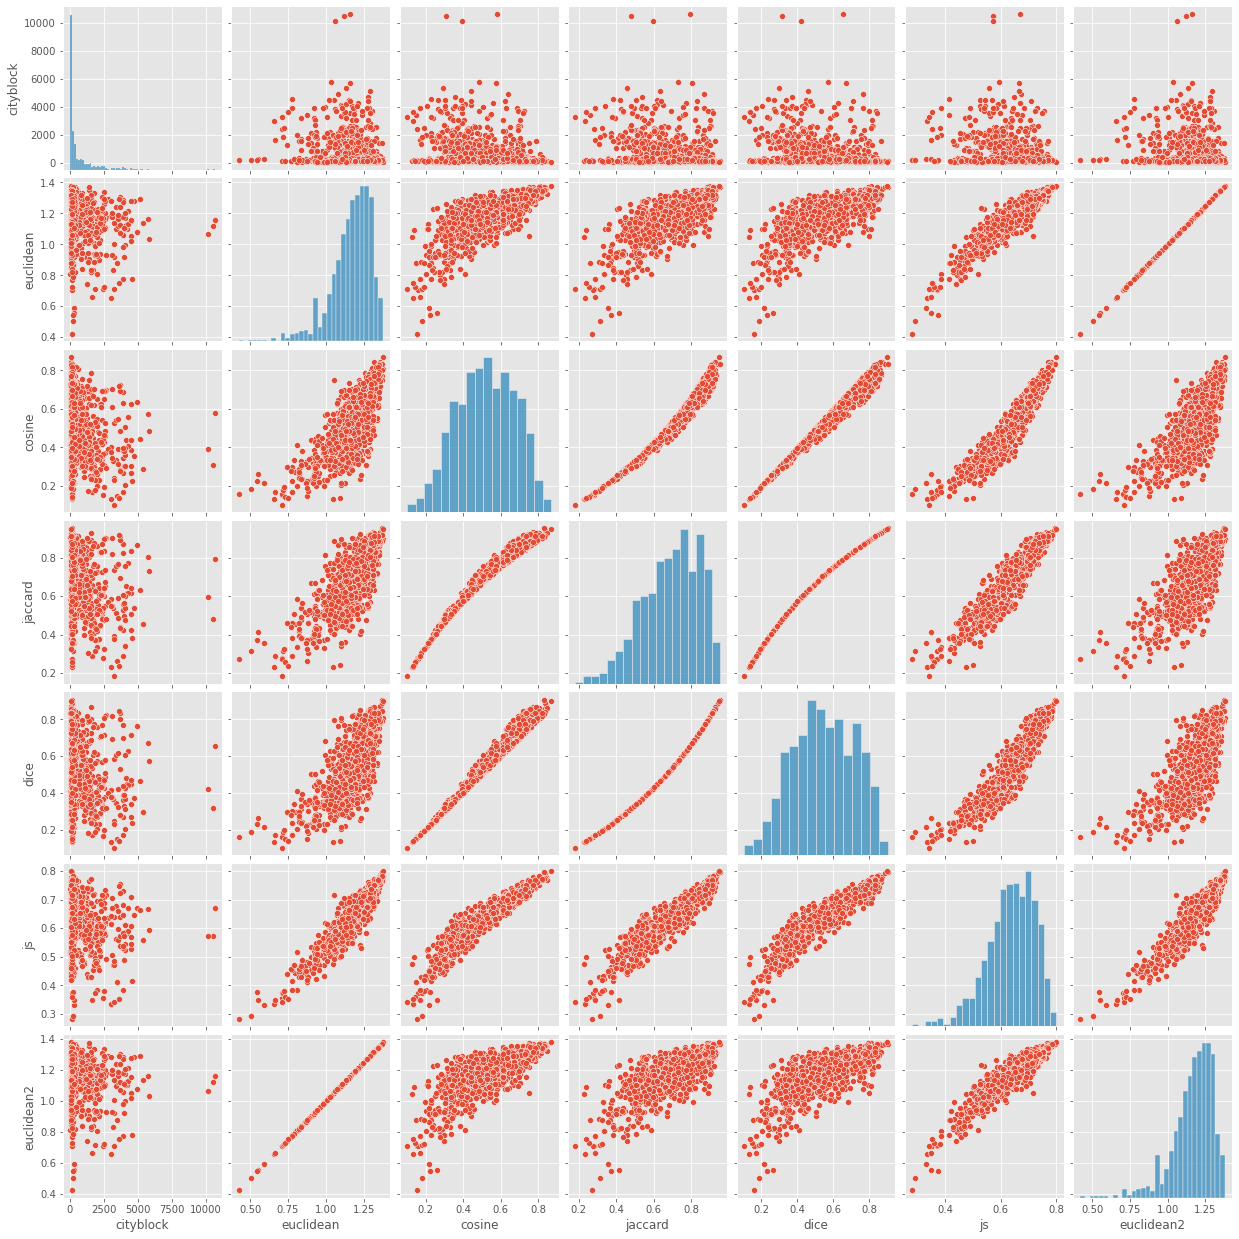

In [110]:
#if PAIRS.shape[0] > 1000:
#    SAMPLE = PAIRS.sample(1000)
#else:
#    SAMPLE = PAIRS
#sns.pairplot(SAMPLE);

In [111]:
#PAIRS.sort_values('cosine').head(20).style.background_gradient('YlGn', high=1)

# 8. Create Clusters

### Hiearchical

In [112]:
DOC

book_id
0        Trump_2016_07_22.txt
1        Trump_2016_07_25.txt
2        Trump_2016_07_26.txt
3      Trump_2016_07_27_A.txt
4      Trump_2016_07_27_B.txt
...                       ...
1039  wilson_speeches_027.txt
1040  wilson_speeches_028.txt
1041  wilson_speeches_029.txt
1042  wilson_speeches_030.txt
1043  wilson_speeches_031.txt

[1044 rows x 1 columns]

In [113]:
def hca(sims, linkage_method='complete', color_thresh=.3):# , figsize=(100, 100)
    tree = sch.linkage(sims, method=linkage_method)
    labels = DOC.book_id.values
    plt.figure()
   # fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

# code taht still need work on

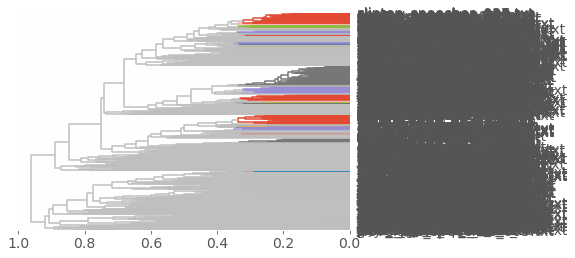

In [114]:
hca(PAIRS.dice, linkage_method='complete', color_thresh=.35);

In [115]:
#hca(PAIRS.cosine, linkage_method='complete', color_thresh=.35);
#hca(PAIRS.jaccard,linkage_method='complete', color_thresh=.3);
#hca(PAIRS.euclidean, linkage_method='ward', color_thresh=10);
#hca(PAIRS.cityblock, linkage_method='complete', color_thresh=500); 
#hca(PAIRS.js, linkage_method='complete', color_thresh=.4);

# 9. 

In [116]:
N = len(TOKEN.groupby(CHAPS))

DF = TOKEN.groupby(CHAPS+['term_str']).term_str.count().groupby('term_str').count()
IDF = np.log2(N/DF)

DP = DF / N
IDP = np.log2(1/DP)

VOCAB['dfidf'] = DF * np.log2(N/DF)
VOCAB['dpidp'] = DP * IDP

In [117]:
VOCAB

n  num  stop   p_stem pos_max     df        idf  \
term_str                                                          
            62526    0     0                :  17873   1.072797   
0              31    1     0        0      CD     25  10.554435   
00             96    1     0       00      CD     58   9.340311   
000             7    1     0      000      CD      6  12.613329   
000000          1    1     0   000000      CD      1  15.198292   
...           ...  ...   ...      ...     ...    ...        ...   
zoological      3    0     0   zoolog     VBN      3  13.613329   
zooming         1    0     0     zoom      JJ      1  15.198292   
zoot            1    0     0     zoot      JJ      1  15.198292   
zuckert         1    0     0  zuckert      JJ      1  15.198292   
zuloaga         5    0     0  zuloaga      JJ      2  14.198292   

            tfidf_sum_book_max         dfidf     dpidp  
term_str                                                
                  67077.727926  19174.107271  0.510004  
0                   327.187496    263.860884  0.007018  
00                  896.669814    541.738012  0.014409  
000                  88.293303     75.679974  0.002013  
000000               15.198292     15.198292  0.000404  
...                        ...           ...       ...  
zoological           40.839987     40.839987  0.001086  
zooming              15.198292     15.198292  0.000404  
zoot                 15.198292     15.198292  0.000404  
zuckert              15.198292     15.198292  0.000404  
zuloaga              70.991458     28.396583  0.000755  

[39730 rows x 10 columns]

In [118]:
VOCAB.index

Index(['', '0', '00', '000', '000000', '0012844122', '0014169969',
       '0014187913', '0014790122', '0015789271',
       ...
       'zippo', 'zollverein', 'zone', 'zones', 'zoning', 'zoological',
       'zooming', 'zoot', 'zuckert', 'zuloaga'],
      dtype='object', name='term_str', length=39730)

In [119]:
VOCAB.sort_values('dpidp', ascending=False).head(20)[['n',  'dpidp', 'dfidf']].style.background_gradient()

In [120]:
#px.scatter(VOCAB, 'tfidf_max_sum', 'dpidp', color='pos_max', height=800, hover_name=VOCAB.index)
#px.scatter(VOCAB, 'i', 'dpidp', color='pos_max', hover_name=VOCAB.index, log_x=True)
DP.sort_values()

term_str
humoredly       0.000027
phantoms        0.000027
pham            0.000027
pflugerville    0.000027
pettit          0.000027
                  ...   
in              0.600064
to              0.700234
and             0.709517
of              0.744973
the             0.809873
Name: term_str, Length: 39730, dtype: float64

In [121]:
LIB

president  \
book_id                             
Trump_2016_07_22.txt        Trump   
Trump_2016_07_25.txt        Trump   
Trump_2016_07_26.txt        Trump   
Trump_2016_07_27_A.txt      Trump   
Trump_2016_07_27_B.txt      Trump   
...                           ...   
wilson_speeches_027.txt    wilson   
wilson_speeches_028.txt    wilson   
wilson_speeches_029.txt    wilson   
wilson_speeches_030.txt    wilson   
wilson_speeches_031.txt    wilson   

                                                                book_title  \
book_id                                                                      
Trump_2016_07_22.txt     Donald Trump, Republican presidential candidat...   
Trump_2016_07_25.txt     Donald Trump, Republican presidential candidat...   
Trump_2016_07_26.txt     Donald Trump, Republican Presidential Candidat...   
Trump_2016_07_27_A.txt   Donald Trump, Republican presidential candidat...   
Trump_2016_07_27_B.txt   Donald Trump, Republican presidential candidat...   
...                                                                    ...   
wilson_speeches_027.txt                     Wilson&#8217;s Fourteen Points   
wilson_speeches_028.txt                               Sixth Annual Message   
wilson_speeches_029.txt                               Fifth Annual Message   
wilson_speeches_030.txt                             Seventh Annual Message   
wilson_speeches_031.txt                              Eighth Annual Message   

                                                                 book_file  
book_id                                                                     
Trump_2016_07_22.txt     ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_25.txt     ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_26.txt     ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_27_A.txt   ./Total_Corpus of Presidential Speeches/Trump_...  
Trump_2016_07_27_B.txt   ./Total_Corpus of Presidential Speeches/Trump_...  
...                                                                    ...  
wilson_speeches_027.txt  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_028.txt  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_029.txt  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_030.txt  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_031.txt  ./Total_Corpus of Presidential Speeches/wilson...  

[1044 rows x 3 columns]

# 10. Select a specific president

In [122]:
LIB.president

book_id
Trump_2016_07_22.txt        Trump
Trump_2016_07_25.txt        Trump
Trump_2016_07_26.txt        Trump
Trump_2016_07_27_A.txt      Trump
Trump_2016_07_27_B.txt      Trump
                            ...  
wilson_speeches_027.txt    wilson
wilson_speeches_028.txt    wilson
wilson_speeches_029.txt    wilson
wilson_speeches_030.txt    wilson
wilson_speeches_031.txt    wilson
Name: president, Length: 1044, dtype: object

In [123]:
LIB1 = LIB[LIB.president == 'Trump'].copy().sort_index()

In [124]:
TOKEN.loc[LIB1.index.values.tolist()].copy().sort_index()

pos_tuple  \
book_id              chap_num para_num sent_num token_num                       
Trump_2016_07_22.txt 0        0        0        0               (<title=, NN)   
                              1        0        0               (Donald, NNP)   
                                                1               (Trump,, NNP)   
                                                2           (Republican, NNP)   
                                                3          (presidential, JJ)   
...                                                                       ...   
Trump_2016_11_09.txt 9        12       0        3                    (to, TO)   
                                                4                  (Mike, VB)   
                                                5                (Pence, NNP)   
                              13       0        0                 (Thank, NN)   
                                                1                  (you, PRP)   

                                                           pos     token_str  \
book_id              chap_num para_num sent_num token_num                      
Trump_2016_07_22.txt 0        0        0        0           NN       <title=   
                              1        0        0          NNP        Donald   
                                                1          NNP        Trump,   
                                                2          NNP    Republican   
                                                3           JJ  presidential   
...                                                        ...           ...   
Trump_2016_11_09.txt 9        12       0        3           TO            to   
                                                4           VB          Mike   
                                                5          NNP         Pence   
                              13       0        0           NN         Thank   
                                                1          PRP           you   

                                                               term_str  
book_id              chap_num para_num sent_num token_num                
Trump_2016_07_22.txt 0        0        0        0                 title  
                              1        0        0                donald  
                                                1                 trump  
                                                2            republican  
                                                3          presidential  
...                                                                 ...  
Trump_2016_11_09.txt 9        12       0        3                    to  
                                                4                  mike  
                                                5                 pence  
                              13       0        0                 thank  
                                                1                   you  

[477857 rows x 4 columns]

In [127]:
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
CHAP = OHCO[:3]
PARA = OHCO[:4] # Paragraphs
SENT = OHCO[:5] # Sentences
BAG = PARA#CHAP #PARA
# BAG = SENT

In [128]:
# word2vec parameters
w2v_params = dict(
    window = 5,
    vector_size = 246,
    min_count = 50,
    workers = 4
)

In [129]:
POS = ["NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
austen = TOKEN[TOKEN["pos"].isin(POS)]
DOCS = TOKEN\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [130]:
DOCS = [doc for doc in DOCS if len(doc) > 1] 

In [131]:
model = word2vec.Word2Vec(DOCS, **w2v_params)

In [132]:
coords = pd.DataFrame(
    dict(
        vector = [model.wv.get_vector(w) for w in model.wv.key_to_index], 
        term_str = model.wv.index_to_key    # 
    )).set_index('term_str')

In [133]:
tsne_engine = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = tsne_engine.fit_transform(coords.vector.to_list())

In [134]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

In [135]:
if coords.shape[1] == 3:
    coords = coords.merge(VOCAB.reset_index(), on='term_str')
    coords = coords.set_index('term_str')

In [136]:
coords = coords[coords.stop == 0]
coords

vector          x  \
term_str                                                                        
                 [-0.012646343, -1.0214013, 0.8978757, -0.42491... -18.979895   
people           [-1.7632948, -1.0583078, 0.12162131, -0.529364...  15.496266   
states           [1.0013468, -0.5961313, -0.62353754, -0.084160...  48.574066   
government       [0.18726936, -0.64006287, 1.8048079, -1.074261...  38.797806   
united           [-0.00030891923, -1.0557595, -0.57835454, -1.1...  48.758022   
...                                                            ...        ...   
accomplishments  [0.10711858, 0.03940222, -0.02409125, -0.10378...  15.059700   
messenger        [-0.08174653, -0.05314659, -0.25686905, -0.006...  -4.348714   
searching        [0.10509141, -0.057937864, 0.0018030284, -0.06... -10.908772   
durable          [0.1375117, -0.20328698, 0.069728434, 0.212347...  -4.688781   
suit             [-0.07355578, -0.11681943, 0.17429467, -0.2706... -16.023235   

                         y      n  num  stop      p_stem pos_max     df  \
term_str                                                                  
                -35.754379  62526    0     0                   :  17873   
people           41.681049  14232    0     0       peopl     NNS   6906   
states          -18.401461  13724    0     0       state      NN   6487   
government        1.111029  12823    0     0      govern      NN   6054   
united          -14.396309  10894    0     0        unit      NN   5771   
...                    ...    ...  ...   ...         ...     ...    ...   
accomplishments  -6.610926     50    0     0  accomplish     NaN     48   
messenger       -35.052544     50    0     0     messeng     VBG     28   
searching        20.629534     50    0     0      search      NN     49   
durable          25.817581     50    0     0      durabl     VBN     46   
suit             -1.086251     50    0     0        suit     NNP     43   

                       idf  tfidf_sum_book_max         dfidf     dpidp  
term_str                                                                
                  1.072797        67077.727926  19174.107271  0.510004  
people            2.444657        34792.357517  16882.800802  0.449058  
states            2.534956        34789.733833  16444.258480  0.437394  
government        2.634619        33783.714247  15949.980976  0.424247  
united            2.703686        29453.954624  15602.971556  0.415017  
...                    ...                 ...           ...       ...  
accomplishments   9.613329          480.666453    461.439795  0.012274  
messenger        10.390937          519.546832    290.946226  0.007739  
searching         9.583582          479.179086    469.595504  0.012491  
durable           9.674730          483.736480    445.037562  0.011837  
suit              9.772027          488.601340    420.197152  0.011177  

[5307 rows x 13 columns]

In [142]:
coords = coords.dropna()

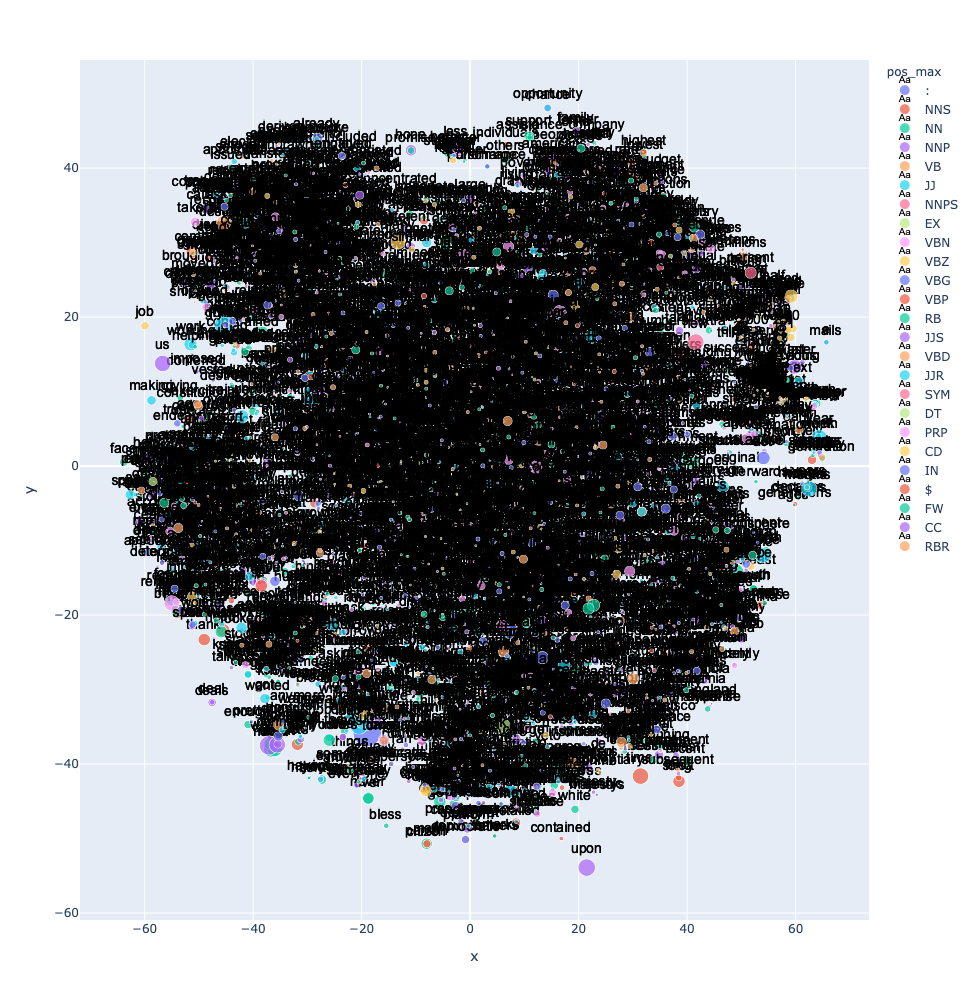

In [145]:
px.scatter(coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='pos_max', 
           hover_name='term_str',          
           size='tfidf_sum_book_max',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [157]:
ngram_range = [1,2]
n_terms = 4000
n_topics = 40
max_iter = 20
n_top_terms = 10
OHCO = ['book_id', 'chapter_num', 'para_num']
PARA = OHCO[:3]
CHAP = OHCO[:2]
BOOK = OHCO[:1]


In [163]:
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]
BAG = CHAPS

In [161]:
TOKEN

pos_tuple  \
book_id                 chap_num para_num sent_num token_num                       
Trump_2016_07_22.txt    0        0        0        0               (<title=, NN)   
                                 1        0        0               (Donald, NNP)   
                                                   1               (Trump,, NNP)   
                                                   2           (Republican, NNP)   
                                                   3          (presidential, JJ)   
...                                                                          ...   
wilson_speeches_031.txt 21       1        0        28              (whether, IN)   
                                                   29                   (in, IN)   
                                                   30             (America, NNP)   
                                                   31                   (or, CC)   
                                                   32            (elsewhere, RB)   

                                                              pos  \
book_id                 chap_num para_num sent_num token_num        
Trump_2016_07_22.txt    0        0        0        0           NN   
                                 1        0        0          NNP   
                                                   1          NNP   
                                                   2          NNP   
                                                   3           JJ   
...                                                           ...   
wilson_speeches_031.txt 21       1        0        28          IN   
                                                   29          IN   
                                                   30         NNP   
                                                   31          CC   
                                                   32          RB   

                                                                 token_str  \
book_id                 chap_num para_num sent_num token_num                 
Trump_2016_07_22.txt    0        0        0        0               <title=   
                                 1        0        0                Donald   
                                                   1                Trump,   
                                                   2            Republican   
                                                   3          presidential   
...                                                                    ...   
wilson_speeches_031.txt 21       1        0        28              whether   
                                                   29                   in   
                                                   30              America   
                                                   31                   or   
                                                   32            elsewhere   

                                                                  term_str  
book_id                 chap_num para_num sent_num token_num                
Trump_2016_07_22.txt    0        0        0        0                 title  
                                 1        0        0                donald  
                                                   1                 trump  
                                                   2            republican  
                                                   3          presidential  
...                                                                    ...  
wilson_speeches_031.txt 21       1        0        28              whether  
                                                   29                   in  
                                                   30              america  
                                                   31                   or  
                                                   32            elsewhere  

[4281518 rows x 4 columns]

In [164]:
DOCS = TOKEN[TOKEN.pos.str.match(r'^NNS?$')]\
    .groupby(BAG).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

In [165]:
count_engine = CountVectorizer(max_features=n_terms, ngram_range=ngram_range, stop_words='english')
count_model = count_engine.fit_transform(DOCS.doc_str)
TERMS = count_engine.get_feature_names()

In [167]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [168]:
THETA = pd.DataFrame(lda_engine.fit_transform(count_model), index=DOCS.index)
THETA.columns.name = 'topic_id'

In [169]:
THETA.sample(20).style.background_gradient()

In [170]:
PHI = pd.DataFrame(lda_engine.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [171]:
PHI.T.sample(10).style.background_gradient()

In [172]:
PHI_P = (PHI.T / PHI.T.sum())
PHI_I = np.log(1/PHI_P)
TOPIC_H = round((PHI_I * PHI_P).sum().sort_values(ascending=False), 2)

<AxesSubplot:ylabel='Density'>

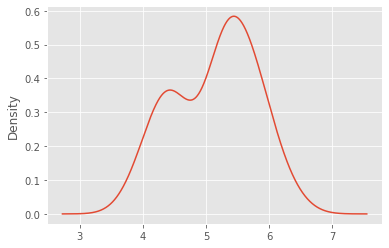

In [173]:
TOPIC_H.plot.kde()

In [174]:
THETA_I = np.log(1/THETA.T)
DOC_H = (THETA_I * THETA.T).sum()

<AxesSubplot:ylabel='Density'>

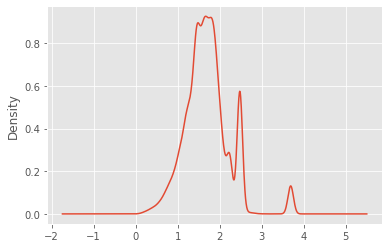

In [175]:
DOC_H.plot.kde()

In [176]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'topic_weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
        x.sort_values('topic_weight', ascending=False)\
               .head(n_top_terms)\
               .reset_index()\
               .drop('topic_id',1)['term_str'])

In [177]:
TOPICS[[t for t in range(n_top_terms)]]

term_str            0             1             2            3  \
topic_id                                                         
0            applause       country          jobs       people   
1                 war         peace        forces        enemy   
2                 tax         taxes       message       income   
3             program         years          year       energy   
4            millions     thousands       history      dollars   
5               banks         money          gold     currency   
6                 act      officers       service        force   
7                line         trump       problem      process   
8              treaty     relations    convention     minister   
9              person         place      audience  examination   
10            weapons         today          arms      control   
11             policy       nations         world       action   
12          attention        report       subject      service   
13               work      progress  construction         time   
14                men         women     men women          day   
15                 mr      question     president        years   
16         government        people        powers      country   
17                law      business          laws  legislation   
18              labor       country      products   production   
19             health          care      children    education   
20              ships       vessels         coast        water   
21               year  expenditures          debt     increase   
22             people       country          time       future   
23              lands        tariff          land       duties   
24           security        allies        troops       people   
25              power     executive        duties       office   
26              right        people  constitution       states   
27              peace         world        rights      nations   
28                man       country          life          men   
29             people    government        nation        party   
30             people           lot         thing       things   
31             matter          case      decision    questions   
32           citizens       country          laws     commerce   
33            economy      business          jobs      workers   
34        information         state    resolution        facts   
35               date     agreement    conference          day   
36         government          plan        reform    insurance   
37              title      campaign       remarks        event   
38              world       freedom        nation     strength   
39               time     statement     situation         days   

term_str               4             5              6              7  \
topic_id                                                               
0                  trump         thank        percent          trade   
1                   time       victory       conflict         battle   
2          title message         title            cut           cuts   
3                percent        budget       programs            oil   
4               hundreds    population       billions       politics   
5                  bonds         notes          value         silver   
6              authority           law           laws           army   
7                hannity   trump trump          miles            yes   
8                 claims   governments     settlement      countries   
9                persons       service        officer       cheering   
10              missiles   destruction         effort      gentlemen   
11             countries      problems       policies          trade   
12         consideration       session    legislation  appropriation   
13                 plans       country          field      resources   
14                 hours      children           hour       soldiers   
15 

In [178]:
TOPICS.stack().to_frame('term').value_counts().to_frame('n').head(5)#.sort_values('n')#.plot.barh(figsize=(5,15))

n
term      
country  9
time     8
people   8
years    6
laws     4

In [179]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ', '.join(x[:n_top_terms]), 1)

In [180]:
TOPICS['doc_weight_mean'] = THETA.mean()

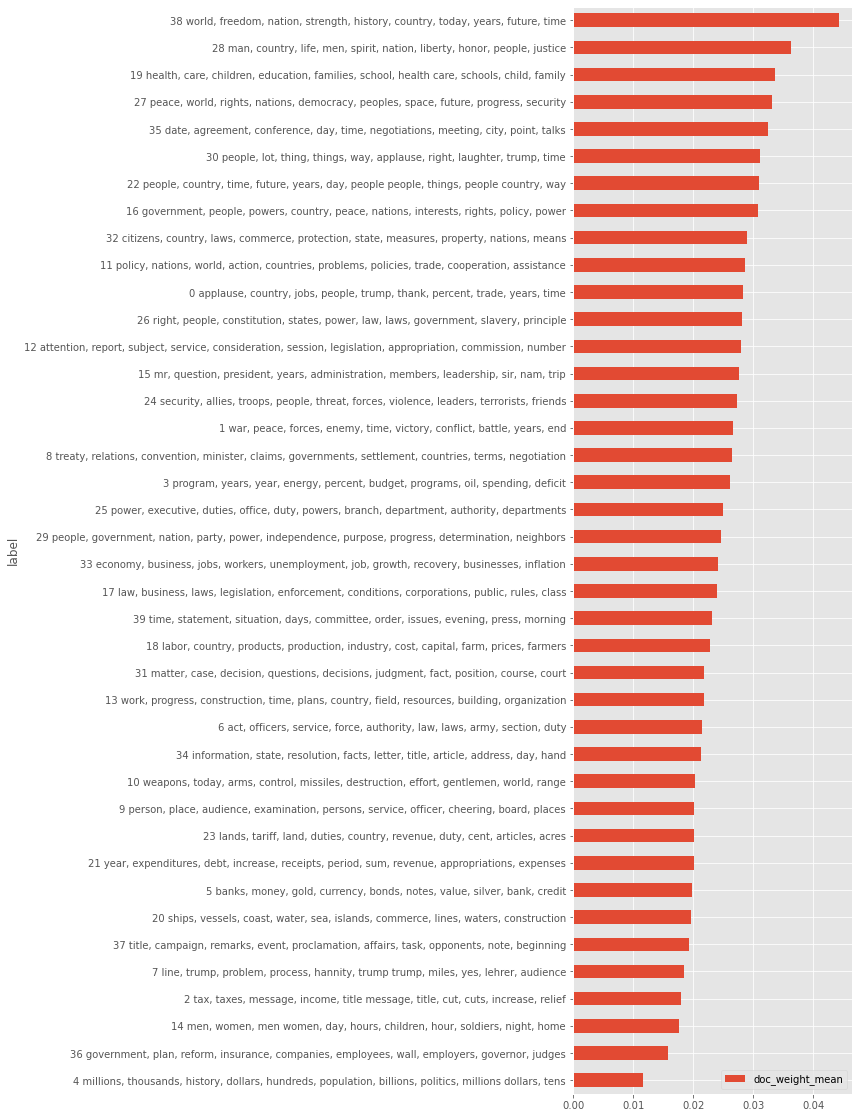

In [181]:
TOPICS.sort_values('doc_weight_mean', ascending=True).plot.barh(y='doc_weight_mean', x='label', figsize=(5,n_topics/2));
#TOPICS['doc_weight_sum'] = THETA.sum()
#TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,n_topics/2));

In [187]:
THETA.join(LIB, on='book_id')

0         1         2         3  \
book_id                 chap_num                                           
Trump_2016_07_22.txt    0         0.003571  0.003571  0.003571  0.003571   
                        1         0.012500  0.012500  0.012500  0.012500   
                        2         0.878125  0.003125  0.003125  0.003125   
                        3         0.098760  0.000373  0.000373  0.000373   
                        4         0.000179  0.016454  0.000179  0.061631   
...                                    ...       ...       ...       ...   
wilson_speeches_031.txt 17        0.000463  0.000463  0.055897  0.000463   
                        18        0.001000  0.001000  0.001000  0.001000   
                        19        0.001250  0.046431  0.001250  0.001250   
                        20        0.001136  0.001136  0.001136  0.001136   
                        21        0.001923  0.001923  0.001923  0.001923   

                                         4         5         6         7  \
book_id                 chap_num                                           
Trump_2016_07_22.txt    0         0.003571  0.003571  0.003571  0.003571   
                        1         0.012500  0.012500  0.012500  0.012500   
                        2         0.003125  0.003125  0.003125  0.003125   
                        3         0.000373  0.000373  0.000373  0.000373   
                        4         0.041351  0.000179  0.000179  0.000179   
...                                    ...       ...       ...       ...   
wilson_speeches_031.txt 17        0.000463  0.051685  0.000463  0.000463   
                        18        0.001000  0.001000  0.001000  0.001000   
                        19        0.001250  0.276711  0.001250  0.001250   
                        20        0.001136  0.001136  0.001136  0.001136   
                        21        0.001923  0.001923  0.001923  0.001923   

                                         8         9  ...        33        34  \
book_id                 chap_num                      ...                       
Trump_2016_07_22.txt    0         0.003571  0.003571  ...  0.003571  0.003571   
                        1         0.012500  0.012500  ...  0.012500  0.012500   
                        2         0.003125  0.003125  ...  0.003125  0.003125   
                        3         0.033340  0.000373  ...  0.000373  0.000373   
                        4         0.000179  0.000179  ...  0.000179  0.000179   
...                                    ...       ...  ...       ...       ...   
wilson_speeches_031.txt 17        0.000463  0.000463  ...  0.000463  0.000463   
                        18        0.001000  0.001000  ...  0.001000  0.001000   
                        19        0.001250  0.001250  ...  0.001250  0.001250   
                        20        0.001136  0.001136  ...  0.001136  0.001136   
                        21        0.001923  0.001923  ...  0.001923  0.001923   

                                        35        36        37        38  \
book_id                 chap_num                                           
Trump_2016_07_22.txt    0         0.003571  0.003571  0.860714  0.003571   
                        1         0.512500  0.012500  0.012500  0.012500   
                        2         0.003125  0.003125  0.003125  0.003125   
                        3         0.016718  0.000373  0.000373  0.000373   
                        4         0.000179  0.000179  0.000179  0.000179   
...                                    ...       ...       ...       ...   
wilson_speeches_031.txt 17        0.021160  0.000463  0.000463  0.000463   
                        18        0.001000  0.001000  0.001000  0.001000   
                        19        0.001250  0.001250  0.001250  0.001250   
                        20        0.001136  0.001136  0.001136  0.001136   
                        21        0.001923  0.001923  0.001923  0.001923   

                    

### Explore Topics by Author

In [190]:
topic_cols = [t for t in range(n_topics)]
Genres = THETA.join(LIB, on='book_id')\
    .reset_index().set_index(['president']+BAG)\
    .groupby('president')[topic_cols].mean()\
    .T                                            
Genres.index.name = 'topic_id'

In [191]:
Genres['label'] = TOPICS['label']

In [194]:
Genres.sort_values('Trump', ascending=False).style.background_gradient()

<AxesSubplot:ylabel='Density'>

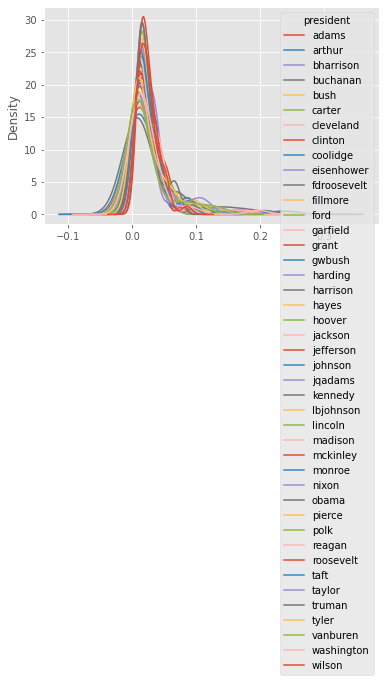

In [221]:
Genres.plot.kde()

In [222]:
import plotly_express as px

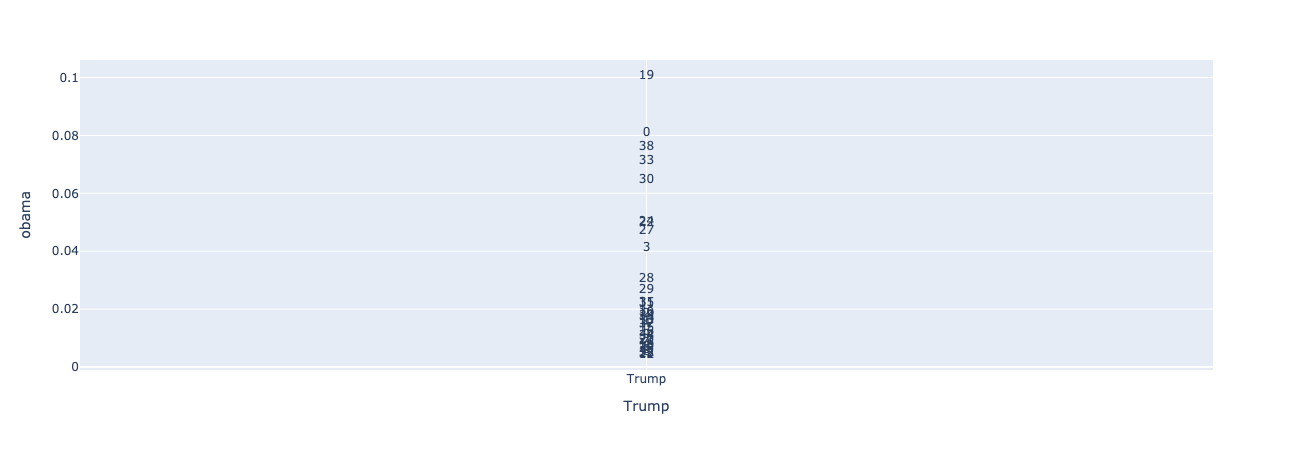

In [226]:
px.scatter(Genres.reset_index(), 'Trump', 'obama', hover_name='label', text='topic_id', width=600)\
    .update_traces(mode='text')

### Add Authors to Topics

In [227]:
Genres['Trump'] = Genres[['Trump']].idxmax(1)
#AUTHORS['author'] = AUTHORS[['d']].idxmax(1)
#AUTHORS['diff'] = np.abs(AUTHORS.austen - AUTHORS.melville)

TypeError: reduction operation 'argmax' not allowed for this dtype

## Clutser Topics

In [229]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [230]:
def plot_tree(tree, labels, color_thresh=1):
    plt.figure()
    fig_height = n_topics / 2
    fig, axes = plt.subplots(figsize=(5, fig_height))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left", color_threshold=color_thresh)
    plt.tick_params(axis='both', which='major', labelsize=14)

In [231]:
SIMS = pdist(normalize(PHI), metric='cosine')
TREE = sch.linkage(SIMS, method='ward')

In [232]:
labels  = ["{} {}".format(a.upper(),b) 
           for a, b in zip(Genres.Trump, TOPICS.label.tolist())]

In [233]:
# labels

<Figure size 432x288 with 0 Axes>

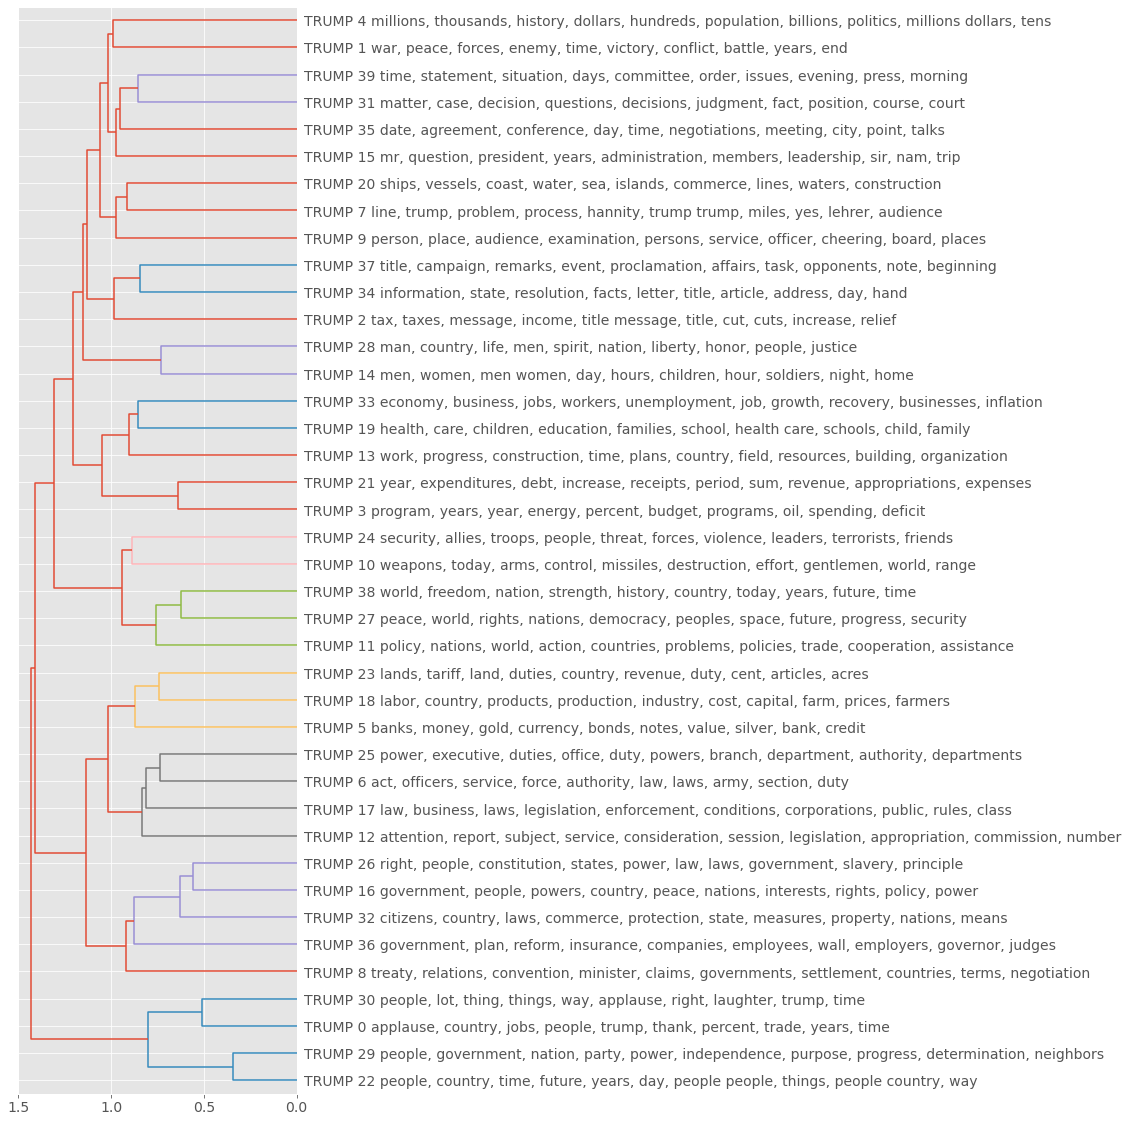

In [234]:
plot_tree(TREE, labels, .9)

### Top Topic per Doc

In [235]:
TOPICS['top_docs'] = THETA.idxmax(1).value_counts().sort_index()

In [236]:
TOPICS[['label','top_docs']].sort_values('top_docs', ascending=False)

term_str                                              label  top_docs
topic_id                                                             
38        38 world, freedom, nation, strength, history, ...      2013
0         0 applause, country, jobs, people, trump, than...      1962
35        35 date, agreement, conference, day, time, neg...      1534
28        28 man, country, life, men, spirit, nation, li...      1466
19        19 health, care, children, education, families...      1447
27        27 peace, world, rights, nations, democracy, p...      1297
16        16 government, people, powers, country, peace,...      1295
32        32 citizens, country, laws, commerce, protecti...      1238
30        30 people, lot, thing, things, way, applause, ...      1210
12        12 attention, report, subject, service, consid...      1106
22        22 people, country, time, future, years, day, ...      1076
26        26 right, people, constitution, states, power,...      1047
8         8 treaty, relations, convention, minister, cla...      1030
15        15 mr, question, president, years, administrat...      1029
3         3 program, years, year, energy, percent, budge...      1018
11        11 policy, nations, world, action, countries, ...       983
24        24 security, allies, troops, people, threat, f...       977
18        18 labor, country, products, production, indus...       874
25        25 power, executive, duties, office, duty, pow...       855
1         1 war, peace, forces, enemy, time, victory, co...       849
29        29 people, government, nation, party, power, i...       848
17        17 law, business, laws, legislation, enforceme...       825
33        33 economy, business, jobs, workers, unemploym...       821
37        37 title, campaign, remarks, event, proclamati...       762
39        39 time, statement, situation, days, committee...       720
23        23 lands, tariff, land, duties, country, reven...       702
5         5 banks, money, gold, currency, bonds, notes, ...       694
6         6 act, officers, service, force, authority, la...       682
9         9 person, place, audience, examination, person...       666
20        20 ships, vessels, coast, water, sea, islands,...       630
10        10 weapons, today, arms, control, missiles, de...       612
34        34 information, state, resolution, facts, lett...       608
2         2 tax, taxes, message, income, title message, ...       597
13        13 work, progress, construction, time, plans, ...       596
7         7 line, trump, problem, process, hannity, trum...       591
21        21 year, expenditures, debt, increase, receipt...       575
31        31 matter, case, decision, questions, decision...       529
14        14 men, women, men women, day, hours, children...       444
36        36 government, plan, reform, insurance, compan...       297
4         4 millions, thousands, history, dollars, hundr...       145

### Top Topics per Doc

In [237]:
topic_weight_thresh = lda_engine.doc_topic_prior_

In [238]:
X = THETA * (THETA >= topic_weight_thresh).astype('int')
DOCTOPICS = pd.DataFrame(X.stack()[X.stack() > 0], columns=['topic_weight'])

In [239]:
DOCTOPICS

topic_weight
book_id                 chap_num topic_id              
Trump_2016_07_22.txt    0        37            0.860714
                        1        35            0.512500
                        2        0             0.878125
                        3        0             0.098760
                                 8             0.033340
...                                                 ...
wilson_speeches_031.txt 20       29            0.431265
                                 31            0.113698
                        21       10            0.071937
                                 29            0.653177
                                 39            0.203732

[159213 rows x 1 columns]

In [244]:
ex = DOCTOPICS.reset_index('topic_id').loc[DOCS.sample().index[0]]\
    .sort_values('topic_weight', ascending=False)

In [245]:
TOPICS.loc[ex.topic_id.tolist()].label.values

array(['10 weapons, today, arms, control, missiles, destruction, effort, gentlemen, world, range',
       '16 government, people, powers, country, peace, nations, interests, rights, policy, power',
       '11 policy, nations, world, action, countries, problems, policies, trade, cooperation, assistance',
       '1 war, peace, forces, enemy, time, victory, conflict, battle, years, end',
       '33 economy, business, jobs, workers, unemployment, job, growth, recovery, businesses, inflation',
       '28 man, country, life, men, spirit, nation, liberty, honor, people, justice',
       '18 labor, country, products, production, industry, cost, capital, farm, prices, farmers',
       '8 treaty, relations, convention, minister, claims, governments, settlement, countries, terms, negotiation',
       '21 year, expenditures, debt, increase, receipts, period, sum, revenue, appropriations, expenses',
       '4 millions, thousands, history, dollars, hundreds, population, billions, politics, millions 